<h1 align="center"><font size="5"><b>Rain Prediction in Australia</b></font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
    <li><a href="https://#Section_8">Conclusions</a></li>
</a></li>
<hr>


# Instructions



Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use the following algorithms :

|Model |Evaluation metric|
|-|-|
| Linear Regression | MAE, MSE, R2-Score |
| KNN | Accuracy, Jaccard, F1-Score, LogLoss |
| Decision Tree |A ccuracy, Jaccard, F1-Score, LogLoss |
| Logistic Regression | Accuracy, Jaccard, F1-Score, LogLoss |
| SVM | Accuracy, Jaccard, F1-Score, LogLoss |

we will use this models to generate the report at the end.


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



### Import the required libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import jaccard_score, f1_score, log_loss, confusion_matrix, accuracy_score

### Importing the Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/IBM Data Science Professional Certificate/9 - Machine Learning with Python/Projects/Weather_Data.csv"
df = pd.read_csv(path)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [ ]:
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
WindDir3pm        object
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [ ]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_sydney_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0,0,0,0,0,0,0,1,0,0


Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [ ]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)
df_sydney_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0,0,0,0,0,0,0,1,0,0


### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [ ]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [ ]:
df_sydney_processed = df_sydney_processed.astype(float)

In [ ]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)
print("x_train : ", x_train.size, "\tx_test : ", x_test.size, "\ny_train : ", y_train.size, "\ty_test : ", y_test.size)

x_train :  172656 	x_test :  43230 
y_train :  2616 	y_test :  655


In [ ]:
LinearReg = linear_model.LinearRegression()
LinearReg.fit(x_train, y_train)
print("Coefficients: ", LinearReg.coef_)
print("Intercept: ", LinearReg.intercept_)

Coefficients:  [-2.36934040e-02  1.29995560e-02  7.29625159e-04  6.48758392e-03
 -3.51687983e-02  4.23655223e-03  1.83079049e-03  7.89537750e-04
  9.55405652e-04  8.56305789e-03  7.71427992e-03 -9.25247903e-03
 -8.86171626e-03  1.00332952e-02  1.44743785e-02 -3.48417548e-03
 -5.05116631e+10 -5.05116631e+10 -1.09342204e+10 -1.09342204e+10
 -1.09342204e+10 -1.09342204e+10 -1.09342204e+10 -1.09342204e+10
 -1.09342204e+10 -1.09342204e+10 -1.09342204e+10 -1.09342204e+10
 -1.09342204e+10 -1.09342204e+10 -1.09342204e+10 -1.09342204e+10
 -1.09342204e+10 -1.09342204e+10 -2.79026559e+09 -2.79026559e+09
 -2.79026559e+09 -2.79026559e+09 -2.79026559e+09 -2.79026559e+09
 -2.79026559e+09 -2.79026559e+09 -2.79026559e+09 -2.79026559e+09
 -2.79026559e+09 -2.79026559e+09 -2.79026559e+09 -2.79026559e+09
 -2.79026559e+09 -2.79026559e+09 -5.02087788e+09 -5.02087788e+09
 -5.02087788e+09 -5.02087788e+09 -5.02087788e+09 -5.02087788e+09
 -5.02087788e+09 -5.02087788e+09 -5.02087788e+09 -5.02087788e+09
 -5.020877

In [ ]:
predictions = LinearReg.predict(x_test)

In [ ]:
LinearRegression_MAE = mean_absolute_error(y_test, predictions)
LinearRegression_MSE = mean_squared_error(y_test, predictions)
LinearRegression_R2 = r2_score(y_test, predictions)

print(f"Mean absolute error : {LinearRegression_MAE:.2f}")
print(f"Residual sum of squares : {LinearRegression_MSE:.2f}")
print(f"R2-score : {LinearRegression_R2:.2f}")

Mean absolute error : 0.26
Residual sum of squares : 0.12
R2-score : 0.43


### KNN


In [ ]:
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    predictions = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, predictions)


    std_acc[n-1]=np.std(predictions==y_test)/np.sqrt(predictions.shape[0])

mean_acc

array([0.77099237, 0.80152672, 0.82290076, 0.81832061, 0.81984733,
       0.8351145 , 0.83358779, 0.82900763, 0.8351145 , 0.82442748,
       0.83664122, 0.83664122, 0.83816794, 0.8351145 , 0.83206107,
       0.83053435, 0.83206107, 0.82900763, 0.82900763, 0.83206107,
       0.82900763, 0.8259542 , 0.82290076, 0.82748092])

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8381679389312977 with k= 13


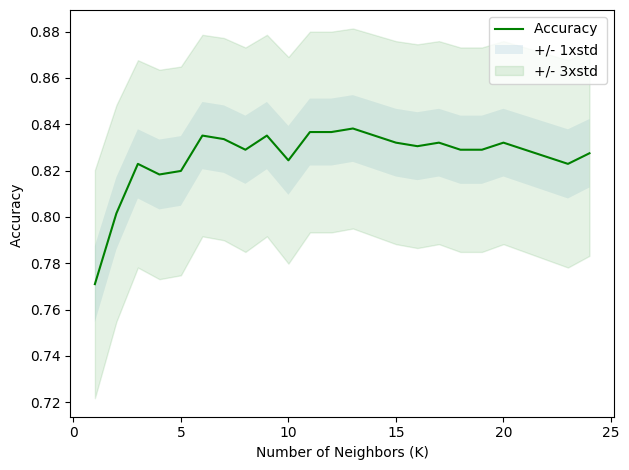

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
k = 19
KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

In [ ]:
predictions = KNN.predict(x_test)

In [ ]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions, average="weighted")
KNN_F1_Score = f1_score(y_test, predictions, average="weighted")

print(f"Accuracy score : {KNN_Accuracy_Score:.2f}")
print(f"Jaccard index score : {KNN_JaccardIndex:.2f}")
print(f"F1-score : {KNN_F1_Score:.2f}")

Accuracy score : 0.83
Jaccard index score : 0.70
F1-score : 0.82


### Decision Tree


In [ ]:
Tree = DecisionTreeClassifier(max_depth=4, random_state=35)
Tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [ ]:
predictions = Tree.predict(x_test)

In [ ]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions, average="weighted")
Tree_F1_Score = f1_score(y_test, predictions, average="weighted")

print(f"Accuracy score : {Tree_Accuracy_Score:.2f}")
print(f"Jaccard index score : {Tree_JaccardIndex:.2f}")
print(f"F1-score : {Tree_F1_Score:.2f}")

Accuracy score : 0.82
Jaccard index score : 0.70
F1-score : 0.81


### Logistic Regression


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

In [ ]:
LR = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [ ]:
predictions = LR.predict(x_test)

In [ ]:
predict_proba = LR.predict_proba(x_test)

In [ ]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions)
LR_F1_Score = f1_score(y_test, predictions, average='weighted')
LR_Log_Loss = log_loss(y_test, predict_proba)

print(f"Accuracy score : {LR_Accuracy_Score:.2f}")
print(f"Jaccard index score : {LR_JaccardIndex:.2f}")
print(f"F1-score : {LR_F1_Score:.2f}")
print(f"Log loss : {LR_Log_Loss:.2f}")

Accuracy score : 0.84
Jaccard index score : 0.51
F1-score : 0.83
Log loss : 0.38


### SVM


In [ ]:
SVM = svm.SVC(kernel='rbf').fit(x_train, y_train)

In [ ]:
predictions = SVM.predict(x_test)

In [ ]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions, average='weighted')
SVM_F1_Score = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy score : {SVM_Accuracy_Score:.2f}")
print(f"Jaccard index score : {SVM_JaccardIndex:.2f}")
print(f"F1-score : {SVM_F1_Score:.2f}")

Accuracy score : 0.72
Jaccard index score : 0.52
F1-score : 0.61


### Report


In [ ]:
Report = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Decision Tree'],
    'Accuracy': [LR_Accuracy_Score, SVM_Accuracy_Score, KNN_Accuracy_Score, Tree_Accuracy_Score],
    'Jaccard Index': [LR_JaccardIndex, SVM_JaccardIndex, KNN_JaccardIndex, Tree_JaccardIndex],
    'F1-Score': [LR_F1_Score, SVM_F1_Score, KNN_F1_Score, Tree_F1_Score],
    'LogLoss': [LR_Log_Loss, np.nan, np.nan]
}

df_report = pd.DataFrame(Report)
df_report

,Model,Accuracy,Jaccard Index,F1-Score,LogLoss
0,Logistic Regression,0.836641,0.509174,0.830866,0.381259
1,Support Vector Machine,0.722137,0.521482,0.605622,NaN
2,K-Nearest Neighbors,0.829008,0.704190,0.815921,NaN


In [ ]:
Report = pd.DataFrame({
                       'Model': ['Linear Regression'],
                       'MAE': [LinearRegression_MAE],
                       'MSE': [LinearRegression_MSE],
                       'R2-Score': [LinearRegression_R2]})
Report

,Model,MAE,MSE,R2-Score
0,Linear Regression,0.256309,0.115719,0.427138


### Conclusions

As evident from the model reports, the Logistic Regression model exhibits the highest accuracy at 83%.

It is worth noting that the K-Nearest Neighbors (KNN) model, once the appropriate number of neighbors has been determined, achieves an accuracy of 82.9%. Furthermore, KNN demonstrates a superior balance between accuracy, precision, and recall.
